Saving covid_19_india.csv to covid_19_india (3).csv
Columns: Index(['Unnamed: 0', 'Date', 'State/UT', 'Latitude', 'Longitude', 'Confirmed',
       'Active', 'Deaths', 'Mortality rate', 'Cured', 'Recovery rate'],
      dtype='object')


/tmp/ipython-input-5-3022588842.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Cluster'] = kmeans.fit_predict(X_scaled)


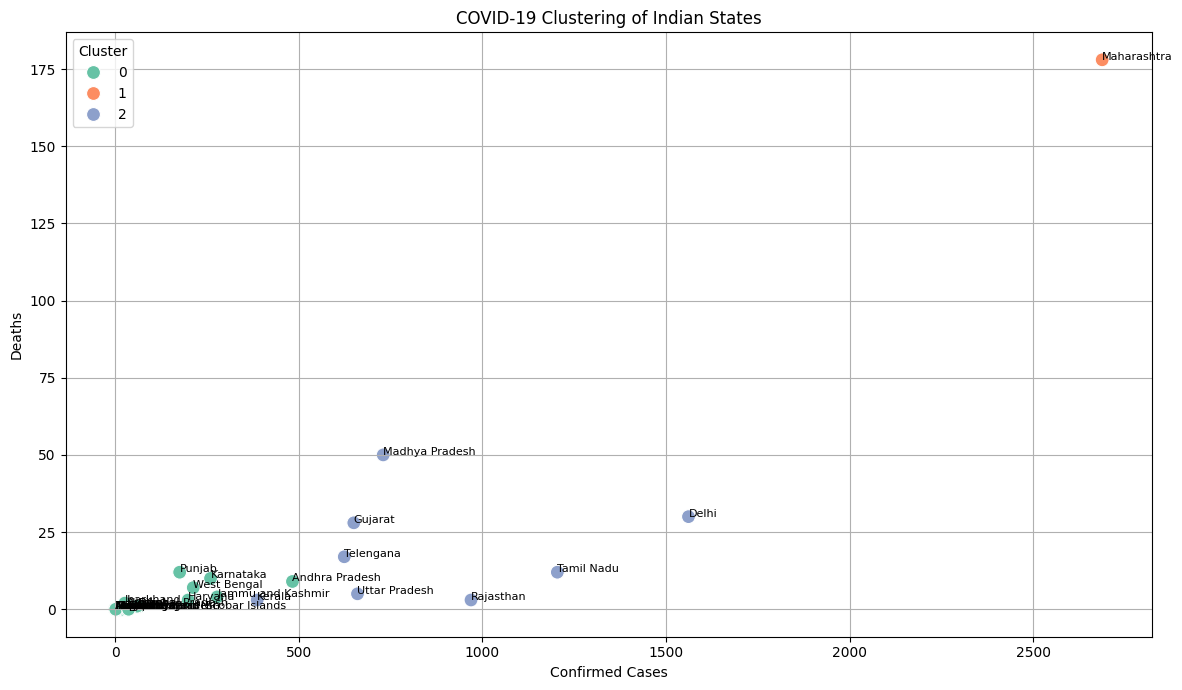

In [5]:
# Step 1: Upload CSV file
from google.colab import files
uploaded = files.upload()  # Upload `covid_19_india.csv`

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 3: Load and inspect the dataset
df = pd.read_csv('covid_19_india.csv')
print("Columns:", df.columns)

# Step 4: Convert date column safely
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

# Step 5: Group by state and take the latest data
latest_df = df.sort_values('Date').groupby('State/UT').tail(1)

# Step 6: Extract needed columns
state_data = latest_df[['State/UT', 'Confirmed', 'Deaths', 'Cured']]
state_data.columns = ['State', 'Confirmed', 'Deaths', 'Recovered']

# Step 7: Standardize the numerical features
X = state_data[['Confirmed', 'Deaths', 'Recovered']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
state_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 9: Visualize results
plt.figure(figsize=(12, 7))
sns.scatterplot(data=state_data, x='Confirmed', y='Deaths', hue='Cluster', palette='Set2', s=100)

# Annotate state names
for i in range(len(state_data)):
    plt.text(state_data['Confirmed'].iloc[i], state_data['Deaths'].iloc[i],
             state_data['State'].iloc[i], fontsize=8)

plt.title('COVID-19 Clustering of Indian States')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()


